Training Accuracy: 0.9996676680068551
Testing Accuracy: 0.9991659281655633


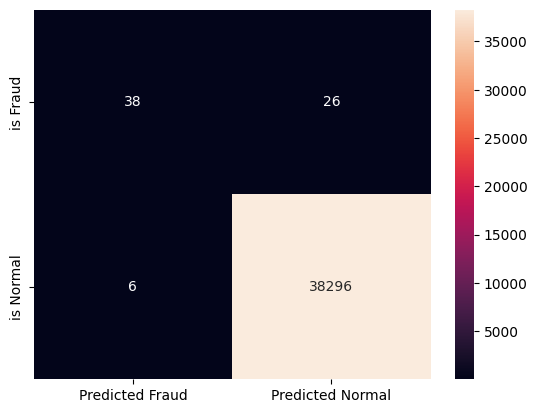

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38302
         1.0       0.86      0.59      0.70        64

    accuracy                           1.00     38366
   macro avg       0.93      0.80      0.85     38366
weighted avg       1.00      1.00      1.00     38366



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Read the CSV file
df = pd.read_csv('/content/creditcard.csv')

# Data Pre-processing
X = df.drop('Class', axis=1)
y = df['Class']

# Check for missing values in y
if y.isnull().sum() > 0:
    missing_indices = y[y.isnull()].index
    X = X.drop(missing_indices)
    y = y.drop(missing_indices)

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardize the features
scalar = StandardScaler()
X = scalar.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Modeling - Train the Support Vector Machine model
model_svc = SVC()
model_svc.fit(X_train, y_train)

# Model Evaluation
train_score = model_svc.score(X_train, y_train)
test_score = model_svc.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

# Predict using the trained model
y_predict = model_svc.predict(X_test)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_predict, labels=[1, 0])
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'], columns=['Predicted Fraud', 'Predicted Normal'])
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()
print(classification_report(y_test, y_predict))
